# **MACHINE LEARNING PROJECT**
## **AUTO-MOBILE PRICE PREDICTION**

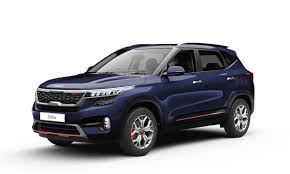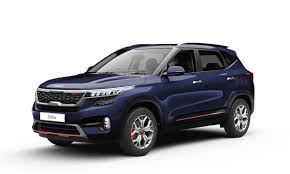

## 1. **BUSINESS CASE: THE AIM IS TO PREDICT THE PRICE OF CAR USING ALL THE GIVEN FEATURES**
     

## 2.**IMPORTING THE PYTHON LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 3.**LOADING THE DATASET**

In [14]:
# Loading the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df = pd.read_csv('auto_imports .csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [17]:
# Naming all columns as its unnamed
df.columns = ['symboling','norm_losses','make','fuel_type','aspiration','no_of_doors','body_style','drive_wheels','eng_loc','wheel_base','length','width','height','curb_weight','eng_type','no_of_cyl','eng_size','fuel_sys','bore','stroke','compr_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df.head()

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 4.**DOMAIN ANALYSIS**
  1) **symboling**:            This rating corresponds to the degree to which the auto is more risky than its price indicates.
      * Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.
      * Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (-3, -2, -1, 0, 1, 2, 3.)<br>
        
  2) **normalized-losses:** This factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car
      per year. (continuous from 65 to 256)<br>
  3) **make**:  This represents the maker/make of auto. (alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo)<br>
  4) **fuel-type:**                Type of fuel used in engine. (diesel, gas)<br> 
  5) **aspiration:**               If the auto has turbo or natually aspirated engine. (std, turbo)<br>
  6) **num-of-doors:**             Number of doors in auto. (four, two)<br>
  7) **body-style:**               Type/style of auto body. (hardtop, wagon, sedan, hatchback, convertible)<br>
  8) **drive-wheels:**             The wheel drive system which transmits force causing the auto to move. (4wd, fwd, rwd)<br>
  9) **engine-location:**          Placement of engine in auto. (front, rear)<br>
 10) **wheel-base:**               The distance between the wheel axles - centers of front and rear wheels. (continuous from 86.6 120.9)<br>
 11) **length:**                   Length of auto. (continuous from 141.1 to 208.1)<br>
 12) **width:**                    Width of auto. (continuous from 60.3 to 72.3)<br>
 13) **height:**                   Height of auto. (continuous from 47.8 to 59.8)<br>
 14) **curb-weight:**              Weight of the car with standard components. (continuous from 1488 to 4066)<br>
 15) **engine-type:**              dohc(double overhead camp), dohcv, l, ohc, ohcf, ohcv(overhead camp valve), rotor.
 16) **num-of-cylinders:**         Number of cylinders used in auto. (eight, five, four, six, three, twelve, two)<br>
 17) **engine-size:**              Size of auto engine. (continuous from 61 to 326)<br>
 18. **fuel-system:**              The system that helps transfer fuel to the engine. (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi)<br>
 19) **bore:**                     Hollow part inside engine/inner diameter of the cylinder. (continuous from 2.54 to 3.94)<br>
 20) **stroke:**                   The full travel of piston along the cylinder. (continuous from 2.07 to 4.17)<br>
 21) **compression-ratio:**        The ratio of maximum to minimum volume in the cylinder of an internal combustion engine. (continuous from 7 to 23<br>
 22) **horsepower:**               Power that an engine produces. (continuous from 48 to 288)<br>
 23) **peak-rpm:**                 RPM that the engine produces at highest horsepower. (continuous from 4150 to 6600)<br>
 24) **city-mpg:**                 Lowest mpg rating for an auto. (continuous from 13 to 49)<br>
 25) **highway-mpg:**              Highest/average mpg rating of an auto while driving on an open stretch road. (continuous from 16 to 54)<br>
 26) **price:**                    Cost of auto. (continuous from 5118 to 45400)

## **BASIC CHECKS**

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Naming all columns as its unnamed
df.columns = ['symboling','norm_losses','make','fuel_type','aspiration','no_of_doors','body_style','drive_wheels','eng_loc','wheel_base','length','width','height','curb_weight','eng_type','no_of_cyl','eng_size','fuel_sys','bore','stroke','compr_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [5]:
df.tail()

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     201 non-null    int64  
 1   norm_losses   201 non-null    object 
 2   make          201 non-null    object 
 3   fuel_type     201 non-null    object 
 4   aspiration    201 non-null    object 
 5   no_of_doors   201 non-null    object 
 6   body_style    201 non-null    object 
 7   drive_wheels  201 non-null    object 
 8   eng_loc       201 non-null    object 
 9   wheel_base    201 non-null    float64
 10  length        201 non-null    float64
 11  width         201 non-null    float64
 12  height        201 non-null    float64
 13  curb_weight   201 non-null    int64  
 14  eng_type      201 non-null    object 
 15  no_of_cyl     201 non-null    object 
 16  eng_size      201 non-null    int64  
 17  fuel_sys      201 non-null    object 
 18  bore          201 non-null    

In [7]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,eng_size,compr_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [8]:
df.describe(include='O')

,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,eng_type,no_of_cyl,fuel_sys,bore,stroke,horsepower,peak_rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [9]:
df.columns

Index(['symboling', 'norm_losses', 'make', 'fuel_type', 'aspiration',
       'no_of_doors', 'body_style', 'drive_wheels', 'eng_loc', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'eng_type', 'no_of_cyl',
       'eng_size', 'fuel_sys', 'bore', 'stroke', 'compr_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [10]:
df.isnull().sum()

symboling       0
norm_losses     0
make            0
fuel_type       0
aspiration      0
no_of_doors     0
body_style      0
drive_wheels    0
eng_loc         0
wheel_base      0
length          0
width           0
height          0
curb_weight     0
eng_type        0
no_of_cyl       0
eng_size        0
fuel_sys        0
bore            0
stroke          0
compr_ratio     0
horsepower      0
peak_rpm        0
city_mpg        0
highway_mpg     0
price           0
dtype: int64

**There are no null values but there are missing values denoted by symbol '?' in columns norm_losses, no_of_doors, bore, stroke, horsepower and peak_rpm which we will be handling in Data Preprocessing stage.**

## 5.**EXPLORATORY DATA ANALYSIS(EDA)**

### 5.1 UNIVARIATE ANALYSIS

In [11]:
# Univariate analysis
auto_report = sv.analyze(df)
auto_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Insights:
   - More than 30% of cars have a risk value of 0 which means that its averagly safe to buy.<br>
   - 15% of the cars are of the make Toyota.<br>
   -  90% of cars have gas engine and only 10% have diesel fuel engine.<br>
   - 82% of cars have naturally aspirated engine and 12% have turbo engines.<br>
   - 56% of cars have 4 doors, 43% have 2 doors.<br>
   - More than 45% of cars are Sedan and around 34% are hatchbacks.<br>
   - Almost 60% of cars have forward wheel drive.<br>
   - Just 1% of cars have engine located in the rear end of car.<br>
   - For most of the cars, wheel base is around 95 to 100.<br>
   - Around 25% of cars are of length 170units. This feature shows almost normal distribution.<br>
   - Around 25% of cars are of width range 66 to 68units.<br>
   - Most of the cars are of height range 55 to 56units.<br>
   - 25% of cars have curb weight of 2500units.<br>
   -  More than 70% of cars have ohc (OverHead Camp) kind of engine.<br>
   - Almost 80% of cars have 4 cylinders.<br>
   - 45% of car's engine size is 100.<br>
   - Around 45% of cars have mpfi kind of fuel system.<br>
   - Most of the car's bore is more than 3.8units.<br>
   - Most of the car's stroke length is more than 3.5units.<br>
   - 65% of cars have compression ratio of 10<br>
   - More than 18% of cars have a horsepower of 68hp.<br>
   - Most of the cars have peak rpm of 5500 or 4800.<br>
   - Around 30% of cars give a milege of 25 in city.<br>
   - More than 20% of cars give a milege in the range of 25 to 35 in highway.<br>
   - 40% of cars have a price range of 5 to 10k.

### 5.2 BIVARIATE ANALYSIS

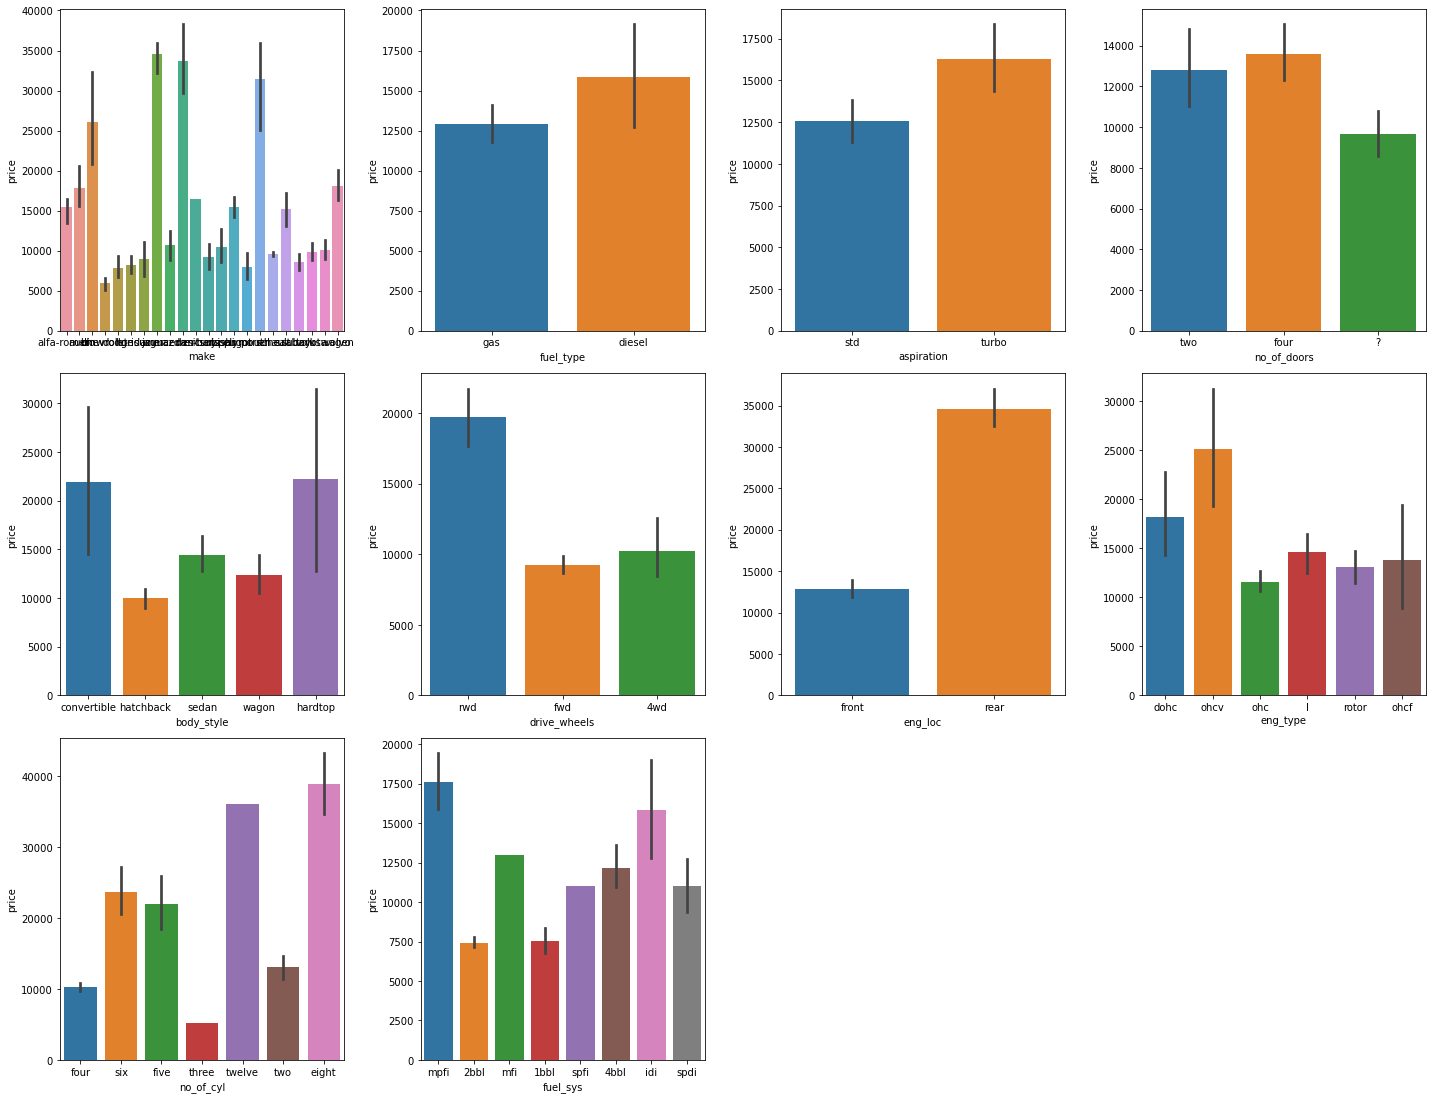

In [11]:
# Bivariate analysis of categorical data w.r.t target variable price
cat_data = df[['make','fuel_type','aspiration','no_of_doors','body_style','drive_wheels','eng_loc','eng_type','no_of_cyl','fuel_sys']]
num_data = df[['norm_losses','bore','stroke','horsepower','peak_rpm','symboling','wheel_base','length','width','height','curb_weight','eng_size','compr_ratio','city_mpg','highway_mpg']]

plt.figure(figsize=(20,20))
pltnum1=1

for i in cat_data:
    if pltnum1<16:
        plt.subplot(4,4,pltnum1)
        sns.barplot(x=cat_data[i],y=df.price)
    pltnum1+=1
plt.tight_layout()
plt.show()

### **Data Insights:**
   

 - Price of Jaguar cars is the highest.<br>
 - The price of diesel engine cars is higher than gas engine cars.<br>
 - Turbo engined cars are pricey than the naturally aspirated cars.<br>
 - Cars with 4 doors are costlier than 2 door cars.<br>
 - Convertible and Hardtop type of cars have higher price than other types.<br>
 - Reverse wheel drive cars have higher price than forward or 4 wheel drive cars.<br>
 - Rear engine cars are costlier than front engine cars.<br>
 - OverHead Camp Valve (ohcv) engine have higher price.<br>
 - 8 cylinder engine cars have highest price.<br>
 - mpfi fuel system car has the highest price.

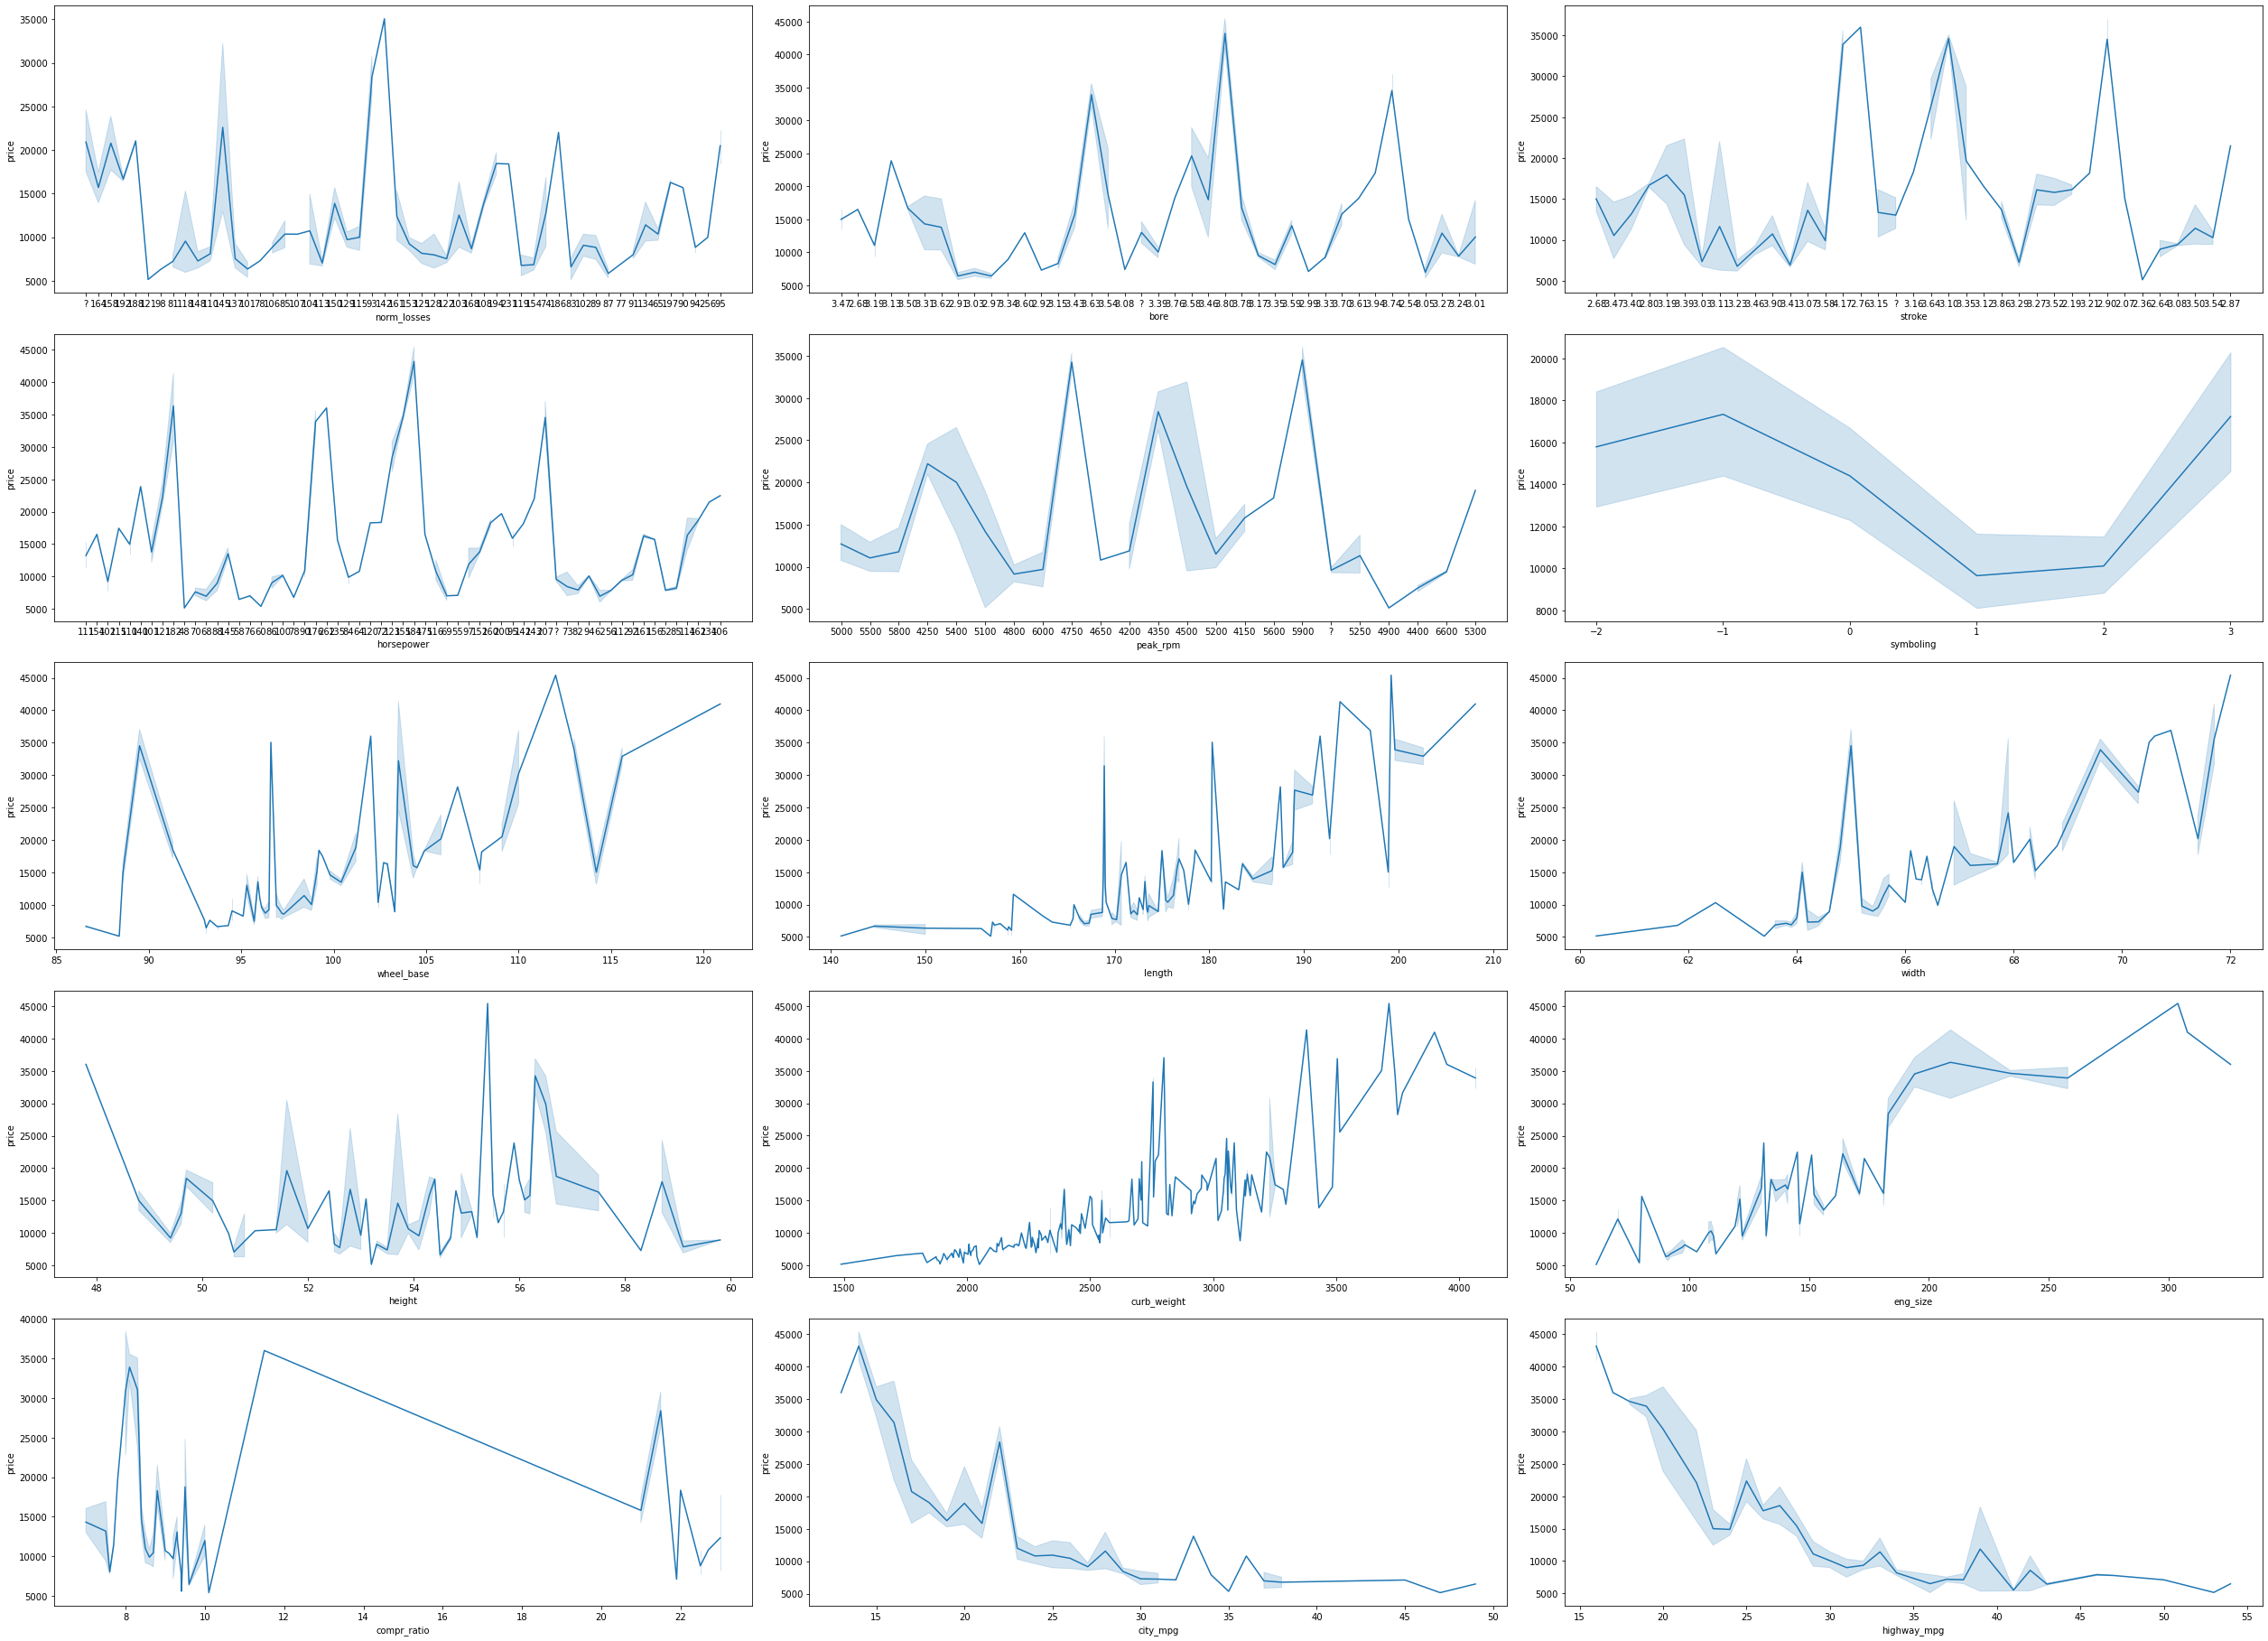

In [12]:
# Bivariate analysis of numerical data w.r.t target variable price
plt.figure(figsize=(35,35))
pltnum2=1

for j in num_data:
    if pltnum2<=15:
        plt.subplot(7,3,pltnum2)
        sns.lineplot(x=num_data[j],y=df.price)
    pltnum2+=1
plt.tight_layout()
plt.show()

### **Data Insights:**
    

 - At an average normalized loss of 142, the price of cars is 35k.<br>
 - Cars with bore measuring 3.8units has the highest price.<br>
 - Cars with stroke length of 2.76units has the highest price.<br>
 - A horsepower of 184 is paid the highest price.<br>
 - Car with peak RPM of 5900 is the costliest.<br>
 - A car with symboling value of -1 has higher price than that with value of 3.<br>
 - Car with wheel base of 112 is paid highest.<br>
 - Car with length of 199.2, width of 72 and height of 55.4 is highly paid.<br>
 - Car with curb weight of 3715 is highly paid.<br>
 - Engine size of 304 has highest price.<br>
 - Compression ratio of 11.5 is paid more.<br>
 - A city mpg of 14 is sold at highest price.<br>
 - A highway mpg of 16 is sold at highest price.

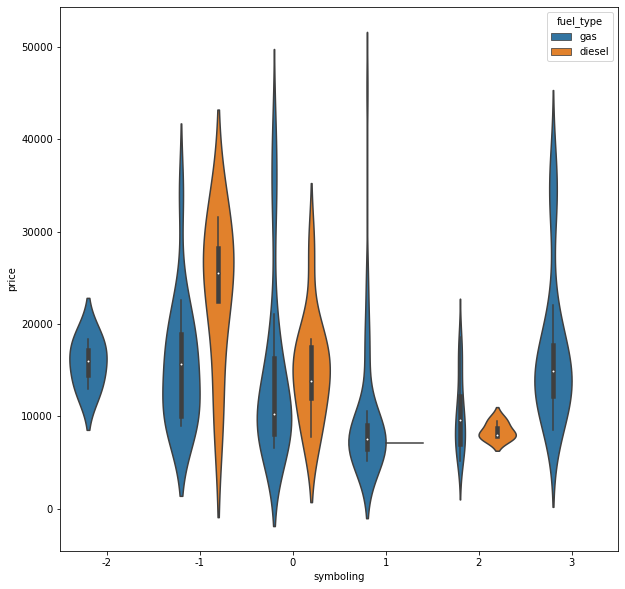

In [13]:
# Multivariate analysis
plt.figure(figsize=(10,10))
sns.violinplot(x=df.symboling,y=df.price,hue=df.fuel_type)
plt.show()

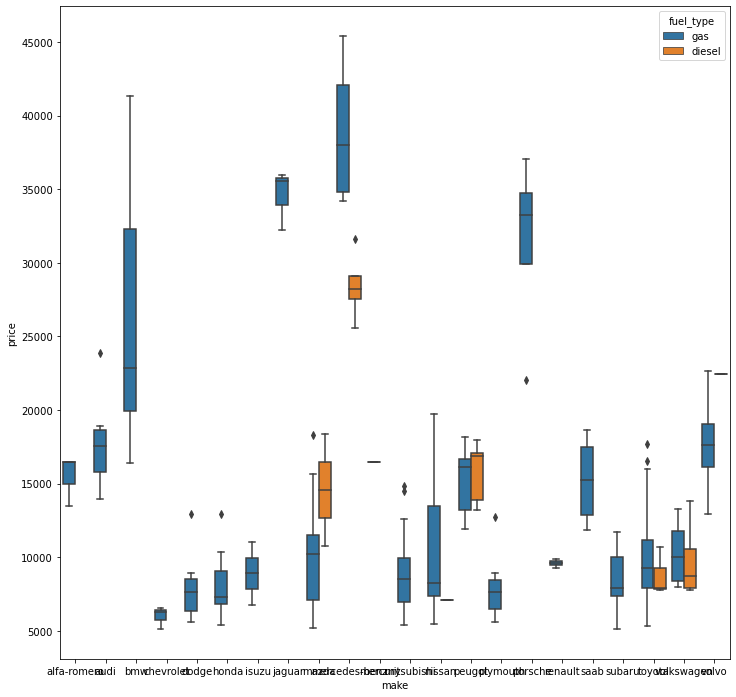

In [14]:
plt.figure(figsize=(12,12))
sns.boxplot(x=df.make,y=df.price,hue=df.fuel_type)
plt.show()

Data Insight:Marcedes-benz with gas fuel type has highest price

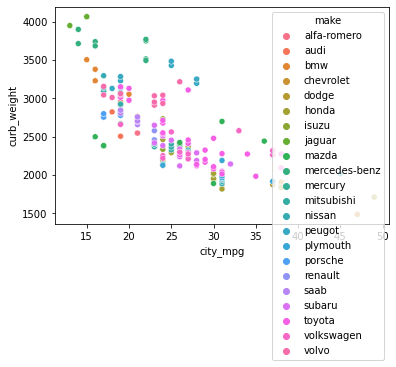

In [15]:
sns.scatterplot(df.city_mpg,df.curb_weight,data=df, hue=df.make)
plt.show()

####  **Data Insight: With increase in weight of vehicle, city mpg decreases.**

##  6.**FEATURE ENGINERING/ DATA PREPROCESSING**

#### 6.1 Checking for missing or null values

In [16]:
# Checking for missing or null values

for col in df:
    if df[col].dtype== 'object':
        print(f"Column and Value counts:\n",col ,df[col].unique())

Column and Value counts:
 norm_losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Column and Value counts:
 make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column and Value counts:
 fuel_type ['gas' 'diesel']
Column and Value counts:
 aspiration ['std' 'turbo']
Column and Value counts:
 no_of_doors ['two' 'four' '?']
Column and Value counts:
 body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column and Value counts:
 drive_wheels ['rwd' 'fwd' '4wd']
Column and Value counts:
 eng_loc ['front' 'rear']
Column and Value counts:
 eng_type ['dohc' 'ohc

**There are no null values but there are missing values denoted by symbol '?' in columns norm_losses, no_of_doors, bore, stroke, horsepower and peak_rpm. We will be handling all these values by replacing them with mean or mode of those features accordingly.**

In [17]:
# Norm_losses
df.loc[df.norm_losses=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
13,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
14,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
15,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
16,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
42,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


115.0

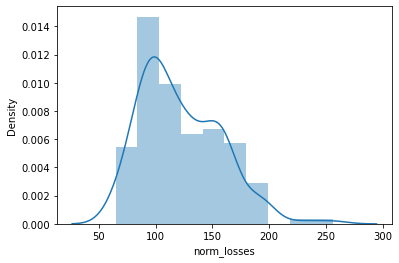

In [18]:
# We will find the mean/median of norm_losses feature without the missing data.
norm_data_wout_miss = df.drop(df[df.norm_losses=='?'].index,axis=0) #dropping all rows with '?' value for norm_losses feature
norm_data_wout_miss = norm_data_wout_miss.norm_losses #extracting only norm_losses feature from norm_data_wout_miss
norm_data_wout_miss = norm_data_wout_miss.astype('float') #changing datatype to float to find the mean/median
# Checking if the distribution of norm_data_wout_miss is normal or not
sns.distplot(norm_data_wout_miss)

norm_data_wout_miss.median()

In [19]:
# We will replace the missing values of norm_losses by this median as the distribution is not normal
df.loc[df.norm_losses=='?','norm_losses'] = norm_data_wout_miss.median()

In [20]:
df.loc[df.norm_losses=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [21]:
# no_of_doors
df.loc[df.no_of_doors=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
26,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,115.0,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [22]:
df.no_of_doors.value_counts()

four    113
two      86
?         2
Name: no_of_doors, dtype: int64

In [23]:
# Replacing the missing values of no_of_doors with 'four' as its the frequently occuring value
df.loc[df.no_of_doors=='?','no_of_doors']='four'

In [24]:
df.loc[df.no_of_doors=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [25]:
# bore
df.loc[df.bore=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


<AxesSubplot:xlabel='bore', ylabel='Density'>

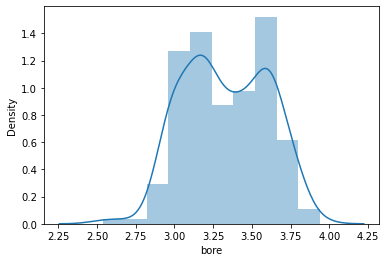

In [26]:
bore_data_wout_miss=df.drop(df[df.bore=='?'].index,axis=0)
bore_data_wout_miss = bore_data_wout_miss.bore
bore_data_wout_miss = bore_data_wout_miss.astype('float')

# Checking if the distribution of bore_data_wout_miss is normal or not
sns.distplot(bore_data_wout_miss)

In [27]:
# Replacing the missing values of bore with median of bore_data_wout_miss as it has not normal disribution
df.loc[df.bore=='?','bore']=bore_data_wout_miss.median()

In [28]:
df.loc[df.bore=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [29]:
# stroke
df.loc[df.stroke=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.31,?,9.4,101,6000,17,23,10945
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.31,?,9.4,101,6000,17,23,11845
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.31,?,9.4,101,6000,17,23,13645
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.31,?,9.4,135,6000,16,23,15645


<AxesSubplot:xlabel='stroke', ylabel='Density'>

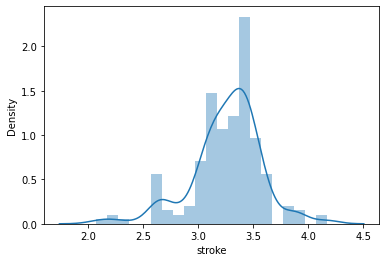

In [30]:
stroke_data_wout_miss = df.drop(df[df.stroke=='?'].index,axis=0)
stroke_data_wout_miss = stroke_data_wout_miss.stroke
stroke_data_wout_miss = stroke_data_wout_miss.astype('float')

# Checking if the distribution of stroke_data_wout_miss is normal or not
sns.distplot(stroke_data_wout_miss)

In [31]:
# Replacing the missing values of stroke with median of stroke_data_wout_miss as it has not normal distribution
df.loc[df.stroke=='?','stroke']=stroke_data_wout_miss.median()

In [32]:
df.loc[df.stroke=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [33]:
# horsepower
df.loc[df.horsepower=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
126,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
127,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

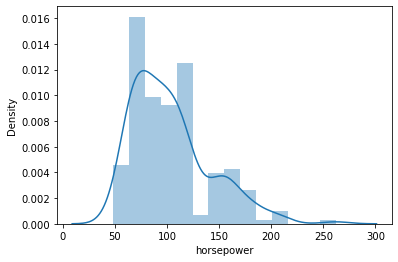

In [34]:
hp_data_wout_miss = df.drop(df[df.horsepower=='?'].index,axis=0)
hp_data_wout_miss = hp_data_wout_miss.horsepower
hp_data_wout_miss = hp_data_wout_miss.astype('float')

# Checking if the distribution of hp_data_wout_miss is normal or not
sns.distplot(hp_data_wout_miss)

In [35]:
# Replacing the missing values of horsepower with median of hp_data_wout_miss as it has not normal distribution
df.loc[df.horsepower=='?','horsepower']=hp_data_wout_miss.median()

In [36]:
df.loc[df.horsepower=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [37]:
# peak_rpm
df.loc[df.peak_rpm=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
126,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,95.0,?,23,31,9295
127,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,95.0,?,23,31,9895


<AxesSubplot:xlabel='peak_rpm', ylabel='Density'>

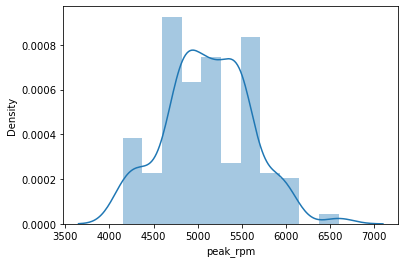

In [38]:
rpm_data_wout_miss = df.drop(df[df.peak_rpm=='?'].index,axis=0)
rpm_data_wout_miss = rpm_data_wout_miss.peak_rpm
rpm_data_wout_miss = rpm_data_wout_miss.astype('float')

# Checking if the distribution of rpm_data_wout_miss is normal or not
sns.distplot(rpm_data_wout_miss)

In [39]:
# Replacing the missing values of peak_rpm with median of rpm_data_wout_miss as it has not normal distribution
df.loc[df.peak_rpm=='?','peak_rpm']=rpm_data_wout_miss.median()

In [40]:
df.loc[df.peak_rpm=='?']

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [41]:
df

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [42]:
for col in df:
    if df[col].dtype== 'object':
        print(col, df[col].unique())

norm_losses [115.0 '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '142' '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119'
 '154' '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90'
 '94' '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type ['gas' 'diesel']
aspiration ['std' 'turbo']
no_of_doors ['two' 'four']
body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels ['rwd' 'fwd' '4wd']
eng_loc ['front' 'rear']
eng_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
no_of_cyl ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel_sys ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3

In [43]:
# Also changing the datatype of these features to float
df.norm_losses = df.norm_losses.astype('float')
df.bore = df.bore.astype('float')
df.stroke = df.stroke.astype('float')
df.horsepower = df.horsepower.astype('int')
df.peak_rpm = df.peak_rpm.astype('float')

* All missing values are successfully handled

### 6.3  Converting categorical data to numerical data


In [44]:
# Converting categorical data to numerical data
for col in df:
    if df[col].dtype == 'object':
        print(f"Column and Value counts:\n",col ,df[col].unique())

Column and Value counts:
 make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column and Value counts:
 fuel_type ['gas' 'diesel']
Column and Value counts:
 aspiration ['std' 'turbo']
Column and Value counts:
 no_of_doors ['two' 'four']
Column and Value counts:
 body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column and Value counts:
 drive_wheels ['rwd' 'fwd' '4wd']
Column and Value counts:
 eng_loc ['front' 'rear']
Column and Value counts:
 eng_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Column and Value counts:
 no_of_cyl ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Column and Value counts:
 fuel_sys ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [45]:
df

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500.0,18,22,17450
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800.0,23,29,16430


###  6.4 Using Label Encoder

In [46]:
# Using Label Encoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df.make = lb.fit_transform(df.make)
df.fuel_type = lb.fit_transform(df.fuel_type) #gas=1, diesel=0
df.aspiration = lb.fit_transform(df.aspiration) #std=0, turbo=1
df.body_style = lb.fit_transform(df.body_style) #convertible=0, wagon=1, hatchback=2, sedan=3
df.drive_wheels = lb.fit_transform(df.drive_wheels) #4wd=0, rwd=2, fwd=1
df.eng_loc = lb.fit_transform(df.eng_loc) #front=0, rear=1
df.eng_type = lb.fit_transform(df.eng_type) #dohc=0, ohcv=4, ohc=2, l=1, rotor=5, ohcf=3
df.fuel_sys = lb.fit_transform(df.fuel_sys) #mpfi=5, idi=3, 1bbl=0, 2bbl=1, 4bbl=2, mfi=4, spfi=7, spdi=6

In [47]:
# Using map() to map the labels
df.no_of_doors = df.no_of_doors.map({'two':2,'four':4})
df.no_of_cyl = df.no_of_cyl.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [48]:
df

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.00,111,5000.0,21,27,13495
1,3,115.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.00,111,5000.0,21,27,16500
2,1,115.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,4,6,152,5,2.68,3.47,9.00,154,5000.0,19,26,16500
3,2,164.0,1,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,2,4,109,5,3.19,3.40,10.00,102,5500.0,24,30,13950
4,2,164.0,1,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,2,5,136,5,3.19,3.40,8.00,115,5500.0,18,22,17450
5,2,115.0,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,2,5,136,5,3.19,3.40,8.50,110,5500.0,19,25,15250
6,1,158.0,1,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,2,5,136,5,3.19,3.40,8.50,110,5500.0,19,25,17710
7,1,115.0,1,1,0,4,4,1,0,105.8,192.7,71.4,55.7,2954,2,5,136,5,3.19,3.40,8.50,110,5500.0,19,25,18920
8,1,158.0,1,1,1,4,3,1,0,105.8,192.7,71.4,55.9,3086,2,5,131,5,3.13,3.40,8.30,140,5500.0,17,20,23875
9,2,192.0,2,1,0,2,3,2,0,101.2,176.8,64.8,54.3,2395,2,4,108,5,3.50,2.80,8.80,101,5800.0,23,29,16430


* All categorical features are now successfully converted to numerical

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     201 non-null    int64  
 1   norm_losses   201 non-null    float64
 2   make          201 non-null    int32  
 3   fuel_type     201 non-null    int32  
 4   aspiration    201 non-null    int32  
 5   no_of_doors   201 non-null    int64  
 6   body_style    201 non-null    int32  
 7   drive_wheels  201 non-null    int32  
 8   eng_loc       201 non-null    int32  
 9   wheel_base    201 non-null    float64
 10  length        201 non-null    float64
 11  width         201 non-null    float64
 12  height        201 non-null    float64
 13  curb_weight   201 non-null    int64  
 14  eng_type      201 non-null    int32  
 15  no_of_cyl     201 non-null    int64  
 16  eng_size      201 non-null    int64  
 17  fuel_sys      201 non-null    int32  
 18  bore          201 non-null    

## 6.5 **HANDLING OUTLIERS**

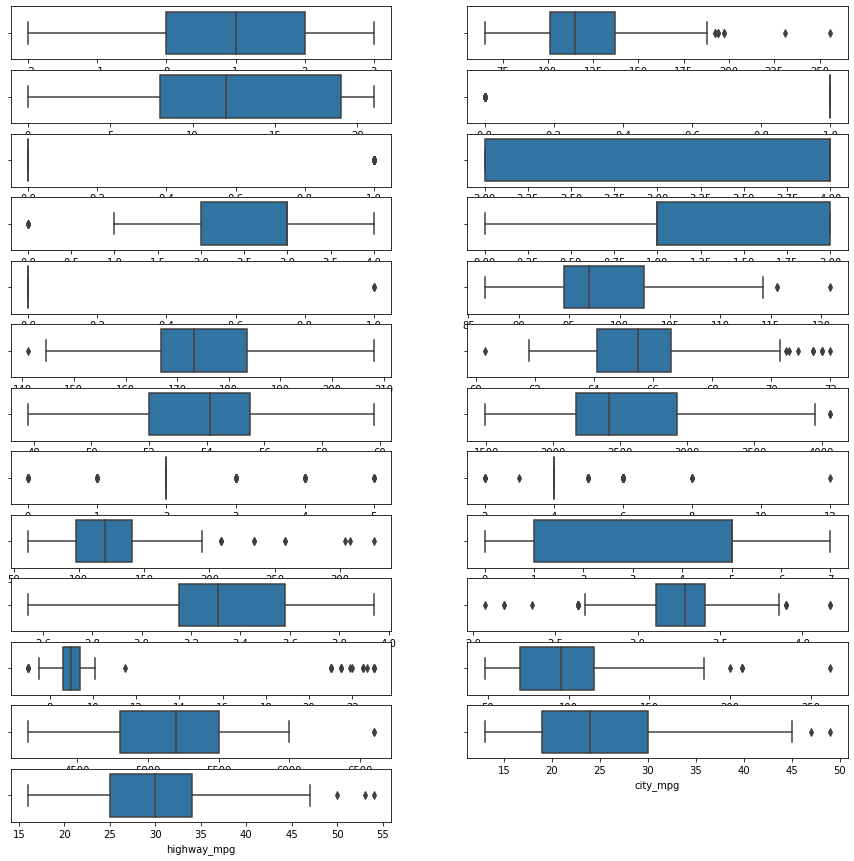

(1, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24)

In [50]:
# Handling Outliers
plt.figure(figsize=(15,15),facecolor='white')
pltnum = 1

for o in df:
    if pltnum<26:
        plt.subplot(13,2,pltnum)
        sns.boxplot(df[o])
        plt.xlabel(o,fontsize=10)
    pltnum+=1
plt.show()
1,3,4,6,8,9,10,11,13,14,15,16,19,20,21,22,23,24

**norm_losses, fuel_type, aspiration, body_style, eng_loc, wheel_base, length, width, curb_weight, eng_type, no_of_cyl, eng_size, 
stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg features have Outliers and need to be handled**

In [51]:
# norm_losses
from scipy import stats

IQR1 = stats.iqr(df.norm_losses)
Q11 = df.norm_losses.quantile(0.25)
Q31 = df.norm_losses.quantile(0.75)

max1 = Q31+1.5*IQR1
min1 = Q11-1.5*IQR1
print(len(df.loc[df.norm_losses>max1]))
print(len(df.loc[df.norm_losses<min1]))

8
0


In [52]:
8/201*100

3.9800995024875623

In [53]:
df.loc[df.norm_losses>max1,'norm_losses']=df.norm_losses.median()

In [54]:
len(df.loc[df.norm_losses>max1])

0

In [55]:
# fuel_type
IQR2 = stats.iqr(df.fuel_type)
Q12 = df.fuel_type.quantile(0.25)
Q32 = df.fuel_type.quantile(0.75)

max2 = Q32+1.5*IQR2
min2 = Q12-1.5*IQR2
print(len(df.loc[df.fuel_type>max2]))
print(len(df.loc[df.fuel_type<min2]))

0
20


In [56]:
20/201*100

9.950248756218906

**As the outlier count is greater than 5%, we will not be handling them for fuel_type.**

In [57]:
# aspiration
IQR3 = stats.iqr(df.aspiration)
Q13 = df.aspiration.quantile(0.25)
Q33 = df.aspiration.quantile(0.75)

max3 = Q33+1.5*IQR3
min3 = Q13-1.5*IQR3
print(len(df.loc[df.aspiration>max3]))
print(len(df.loc[df.aspiration<min3]))

36
0


In [58]:
36/201*100

17.91044776119403

* As the outlier count is greater than 5%, we will not be handling them for aspiration

In [59]:
# body_style
IQR4 = stats.iqr(df.body_style)
Q14 = df.body_style.quantile(0.25)
Q34 = df.body_style.quantile(0.75)

max4 = Q34+1.5*IQR4
min4 = Q14-1.5*IQR4
print(len(df.loc[df.body_style>max4]))
print(len(df.loc[df.body_style<min4]))

0
6


In [60]:
6/201*100

2.9850746268656714

In [61]:
print(df.body_style.value_counts())
# Replacing outliers with mode(3) of body_style as its a discrete feature
df.loc[df.body_style<min4,'body_style']=3

3    94
2    68
4    25
1     8
0     6
Name: body_style, dtype: int64


In [62]:
print(len(df.loc[df.body_style<min4]))

0


In [63]:
# eng_loc
IQR5 = stats.iqr(df.eng_loc)
Q15 = df.eng_loc.quantile(0.25)
Q35 = df.eng_loc.quantile(0.75)

max5 = Q35+1.5*IQR5
min5 = Q15-1.5*IQR5
print(len(df.loc[df.eng_loc>max5]))
print(len(df.loc[df.eng_loc<min5]))

3
0


In [64]:
3/201*100

1.4925373134328357

In [65]:
print(df.eng_loc.value_counts())
# Replacing outliers with mode(0) of eng_loc as its a discrete feature
df.loc[df.eng_loc>max5,'eng_loc']=0

0    198
1      3
Name: eng_loc, dtype: int64


In [66]:
print(len(df.loc[df.eng_loc>max5]))

0


In [67]:
# wheel_base
IQR6 = stats.iqr(df.wheel_base)
Q16 = df.wheel_base.quantile(0.25)
Q36 = df.wheel_base.quantile(0.75)

max6 = Q36+1.5*IQR6
min6 = Q16-1.5*IQR6
print(len(df.loc[df.wheel_base>max6]))
print(len(df.loc[df.wheel_base<min6]))

3
0


In [68]:
3/201*100

1.4925373134328357

In [69]:
df.loc[df.wheel_base>max6,'wheel_base']=df.wheel_base.median()

In [70]:
len(df.loc[df.wheel_base>max6])

0

In [71]:
# length
#Using Empherical rule as length feature has normal distribution

max7 = df.length.mean()+3*df.length.std()
min7 = df.length.mean()-3*df.length.std()
print(len(df.loc[df.length>max7]))
print(len(df.loc[df.length<min7]))

0
0


In [72]:
# width
IQR8 = stats.iqr(df.width)
Q18 = df.width.quantile(0.25)
Q38 = df.width.quantile(0.75)

max8 = Q38+1.5*IQR8
min8 = Q18-1.5*IQR8
print(len(df.loc[df.width>max8]))
print(len(df.loc[df.width<min8]))

10
1


In [73]:
10/201*100

4.975124378109453

In [74]:
df.loc[df.width>max8,'width']=df.width.median()
df.loc[df.width<min8,'width']=df.width.median()

In [75]:
print(len(df.loc[df.width>max8]))
print(len(df.loc[df.width<min8]))

0
0


In [76]:
# curb_weight
IQR9 = stats.iqr(df.curb_weight)
Q19 = df.curb_weight.quantile(0.25)
Q39 = df.curb_weight.quantile(0.75)

max9 = Q39+1.5*IQR9
min9 = Q19-1.5*IQR9
print(len(df.loc[df.curb_weight>max9]))
print(len(df.loc[df.curb_weight<min9]))

2
0


In [77]:
2/201*100

0.9950248756218906

In [78]:
df.loc[df.curb_weight>max9,'curb_weight']=df.curb_weight.median()

In [79]:
len(df.loc[df.curb_weight>max9])

0

In [80]:
# eng_type
IQR10 = stats.iqr(df.eng_type)
Q110 = df.eng_type.quantile(0.25)
Q310 = df.eng_type.quantile(0.75)

max10 = Q310+1.5*IQR10
min10 = Q110-1.5*IQR10
print(len(df.loc[df.eng_type>max10]))
print(len(df.loc[df.eng_type<min10]))

32
24


In [81]:
print(32/201*100)
print(24/201*100)

15.92039800995025
11.940298507462686


* As the outlier count is greater than 5%, we will not be handling them for eng_type

In [82]:
# no_of_cyl
IQR11 = stats.iqr(df.no_of_cyl)
Q111 = df.no_of_cyl.quantile(0.25)
Q311 = df.no_of_cyl.quantile(0.75)

max11 = Q311+1.5*IQR11
min11 = Q111-1.5*IQR11
print(len(df.loc[df.no_of_cyl>max11]))
print(len(df.loc[df.no_of_cyl<min11]))

39
5


In [83]:
print(39/201*100)
print(5/201*100)

19.402985074626866
2.4875621890547266


In [84]:
# As the outliers that are beyond Q3 is more than 5%, we will not be handling them, but just handling the ones that are below Q1
print(df.no_of_cyl.value_counts())
# Replacing outliers with mode(4) as no_of_cyl is a discrete feature
df.loc[df.no_of_cyl<min11,'no_of_cyl']=4

4     157
6      24
5      10
2       4
8       4
3       1
12      1
Name: no_of_cyl, dtype: int64


In [85]:
len(df.loc[df.no_of_cyl<min11])

0

In [86]:
# eng_size
IQR12 = stats.iqr(df.eng_size)
Q112 = df.eng_size.quantile(0.25)
Q312 = df.eng_size.quantile(0.75)

max12 = Q312+1.5*IQR12
min12 = Q112-1.5*IQR12
print(len(df.loc[df.eng_size>max12]))
print(len(df.loc[df.eng_size<min12]))

10
0


In [87]:
10/201*100

4.975124378109453

In [88]:
df.loc[df.eng_size>max12,'eng_size']=df.eng_size.median()

In [89]:
len(df.loc[df.eng_size>max12])

0

In [90]:
# stroke
IQR13 = stats.iqr(df.stroke)
Q113 = df.stroke.quantile(0.25)
Q313 = df.stroke.quantile(0.75)

max13 = Q313+1.5*IQR13
min13 = Q113-1.5*IQR13
print(len(df.loc[df.stroke>max13]))
print(len(df.loc[df.stroke<min13]))

5
15


In [91]:
print(5/201*100)
print(15/201*100)

2.4875621890547266
7.462686567164178


In [92]:
# As the outliers that are below Q1 is more than 5%, we will not be handling them, but just handling the ones that are beyond Q3
df.loc[df.stroke>max13,'stroke']=df.stroke.median()

In [93]:
len(df.loc[df.stroke>max13])

0

In [94]:
# compr_ratio
IQR14 = stats.iqr(df.compr_ratio)
Q114 = df.compr_ratio.quantile(0.25)
Q314 = df.compr_ratio.quantile(0.75)

max14 = Q314+1.5*IQR14
min14 = Q114-1.5*IQR14
print(len(df.loc[df.compr_ratio>max14]))
print(len(df.loc[df.compr_ratio<min14]))

21
6


In [95]:
print(21/201*100)
print(6/201*100)

10.44776119402985
2.9850746268656714


In [96]:
# As the outliers that are beyond Q3 is more than 5%, we will not be handling them, but just handling the ones that are below Q1
df.loc[df.compr_ratio<min14,'compr_ratio']=df.compr_ratio.median()

In [97]:
len(df.loc[df.compr_ratio<min14])

0

In [98]:
# horsepower
IQR15 = stats.iqr(df.horsepower)
Q115 = df.horsepower.quantile(0.25)
Q315 = df.horsepower.quantile(0.75)

max15 = Q315+1.5*IQR15
min15 = Q115-1.5*IQR15
print(len(df.loc[df.horsepower>max15]))
print(len(df.loc[df.horsepower<min15]))

5
0


In [99]:
5/201*100

2.4875621890547266

In [100]:
df.loc[df.horsepower>max15,'horsepower']=df.horsepower.median()

In [101]:
len(df.loc[df.horsepower>max15])

0

In [102]:
# peak_rpm
IQR16 = stats.iqr(df.peak_rpm)
Q116 = df.peak_rpm.quantile(0.25)
Q316 = df.peak_rpm.quantile(0.75)

max16 = Q316+1.5*IQR16
min16 = Q116-1.5*IQR16
print(len(df.loc[df.peak_rpm>max16]))
print(len(df.loc[df.peak_rpm<min16]))

2
0


In [103]:
df.loc[df.peak_rpm>max16,'peak_rpm']=df.peak_rpm.median()

In [104]:
len(df.loc[df.peak_rpm>max16])

0

In [105]:
# city_mpg
IQR17 = stats.iqr(df.city_mpg)
Q117 = df.city_mpg.quantile(0.25)
Q317 = df.city_mpg.quantile(0.75)

max17 = Q317+1.5*IQR17
min17 = Q117-1.5*IQR17
print(len(df.loc[df.city_mpg>max17]))
print(len(df.loc[df.city_mpg<min17]))

2
0


In [106]:
df.loc[df.city_mpg>max17,'city_mpg']=df.city_mpg.median()

In [107]:
len(df.loc[df.city_mpg>max17])

0

In [108]:
# highway_mpg
IQR18 = stats.iqr(df.highway_mpg)
Q118 = df.highway_mpg.quantile(0.25)
Q318 = df.highway_mpg.quantile(0.75)

max18 = Q318+1.5*IQR18
min18 = Q118-1.5*IQR18
print(len(df.loc[df.highway_mpg>max18]))
print(len(df.loc[df.highway_mpg<min18]))

3
0


In [109]:
df.loc[df.highway_mpg>max18,'highway_mpg']=df.highway_mpg.median()

In [110]:
len(df.loc[df.highway_mpg>max18])

0

* All outliers of 18 features are successfully handled

## 7.**FEATURE SELECTION**

### 7.1 Checking for correlation


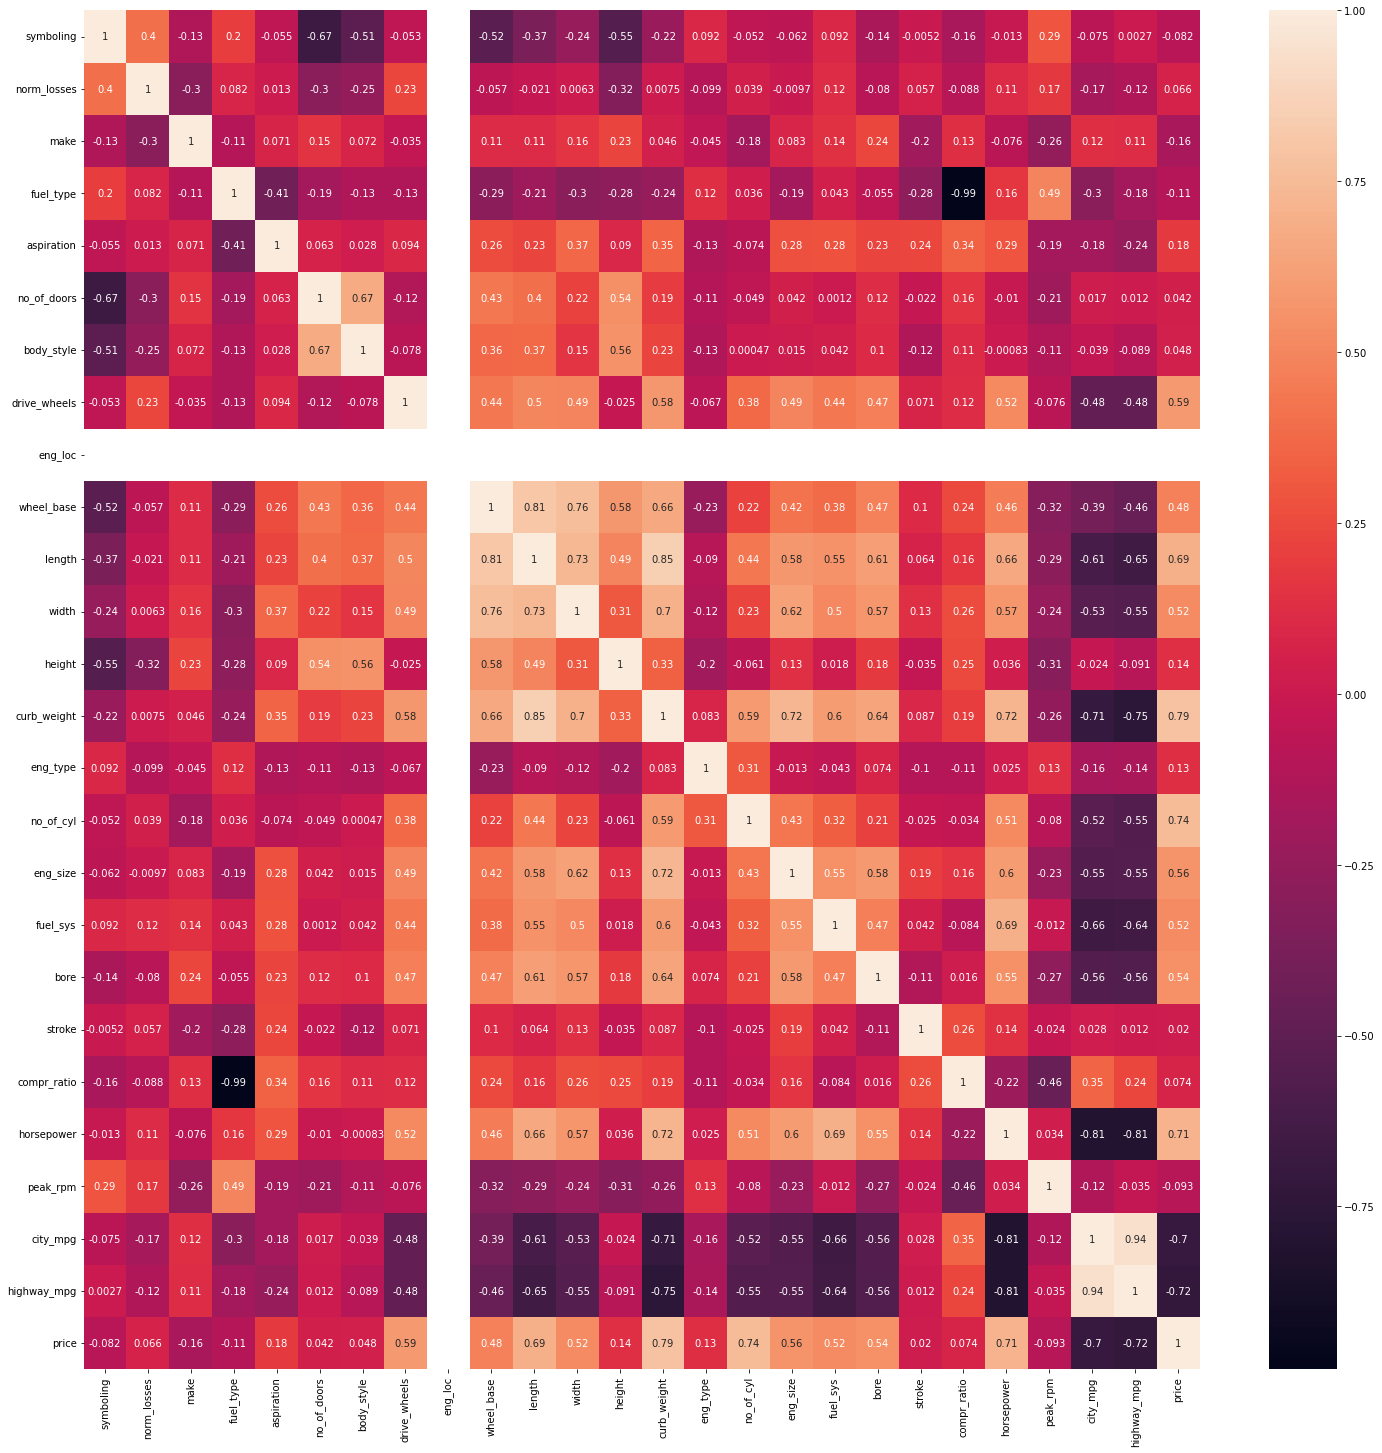

In [111]:
# Checking for correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [112]:
df.describe()

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,eng_loc,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,compr_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,117.064677,12.298507,0.900498,0.179104,3.144279,2.706468,1.333333,0.0,98.493035,174.200995,65.624876,53.766667,2539.228856,2.084577,4.407960,120.164179,3.258706,3.330299,3.239701,10.223980,100.288557,5104.477612,24.940299,30.353234,13207.129353
std,1.254802,26.533579,6.253035,0.300083,0.384397,0.992008,0.733763,0.550757,0.0,5.611618,12.322175,1.645168,2.447822,494.685736,0.898783,1.001367,27.860867,2.013141,0.268088,0.291714,3.971958,32.488557,454.510562,5.999701,6.266546,7947.066342
min,-2.000000,65.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.0,86.600000,141.100000,61.800000,47.800000,1488.000000,0.000000,4.000000,61.000000,0.000000,2.540000,2.070000,7.500000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,8.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.0,94.500000,166.800000,64.200000,52.000000,2169.000000,2.000000,4.000000,98.000000,1.000000,3.150000,3.110000,8.700000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,12.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.0,97.000000,173.200000,65.500000,54.100000,2414.000000,2.000000,4.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,134.000000,19.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.0,101.200000,183.500000,66.500000,55.500000,2912.000000,2.000000,4.000000,136.000000,5.000000,3.580000,3.400000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,188.000000,21.000000,1.000000,1.000000,4.000000,4.000000,2.000000,0.0,114.200000,208.100000,70.300000,59.800000,3950.000000,5.000000,12.000000,194.000000,7.000000,3.940000,3.860000,23.000000,184.000000,6000.000000,45.000000,47.000000,45400.000000


In [113]:
# eng_loc feature has single value throughout after converting it to numerical and handling its outliers. Also its std is 0.
# So will be dropping this feature
print(df.eng_loc.value_counts())
df.drop('eng_loc',axis=1,inplace=True)

0    201
Name: eng_loc, dtype: int64


In [114]:
# Dropping compr_ratio as it has highly negative correlation with fuel_type
# Also dropping highway_mpg as it has highly positive correlation with city_mpg
df.drop(['compr_ratio','highway_mpg'],axis=1,inplace=True)

In [115]:
df

,symboling,norm_losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,eng_type,no_of_cyl,eng_size,fuel_sys,bore,stroke,horsepower,peak_rpm,city_mpg,price
0,3,115.0,0,1,0,2,3,2,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,111,5000.0,21,13495
1,3,115.0,0,1,0,2,3,2,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,111,5000.0,21,16500
2,1,115.0,0,1,0,2,2,2,94.5,171.2,65.5,52.4,2823,4,6,152,5,2.68,3.47,154,5000.0,19,16500
3,2,164.0,1,1,0,4,3,1,99.8,176.6,66.2,54.3,2337,2,4,109,5,3.19,3.40,102,5500.0,24,13950
4,2,164.0,1,1,0,4,3,0,99.4,176.6,66.4,54.3,2824,2,5,136,5,3.19,3.40,115,5500.0,18,17450
5,2,115.0,1,1,0,2,3,1,99.8,177.3,66.3,53.1,2507,2,5,136,5,3.19,3.40,110,5500.0,19,15250
6,1,158.0,1,1,0,4,3,1,105.8,192.7,65.5,55.7,2844,2,5,136,5,3.19,3.40,110,5500.0,19,17710
7,1,115.0,1,1,0,4,4,1,105.8,192.7,65.5,55.7,2954,2,5,136,5,3.19,3.40,110,5500.0,19,18920
8,1,158.0,1,1,1,4,3,1,105.8,192.7,65.5,55.9,3086,2,5,131,5,3.13,3.40,140,5500.0,17,23875
9,2,115.0,2,1,0,2,3,2,101.2,176.8,64.8,54.3,2395,2,4,108,5,3.50,2.80,101,5800.0,23,16430


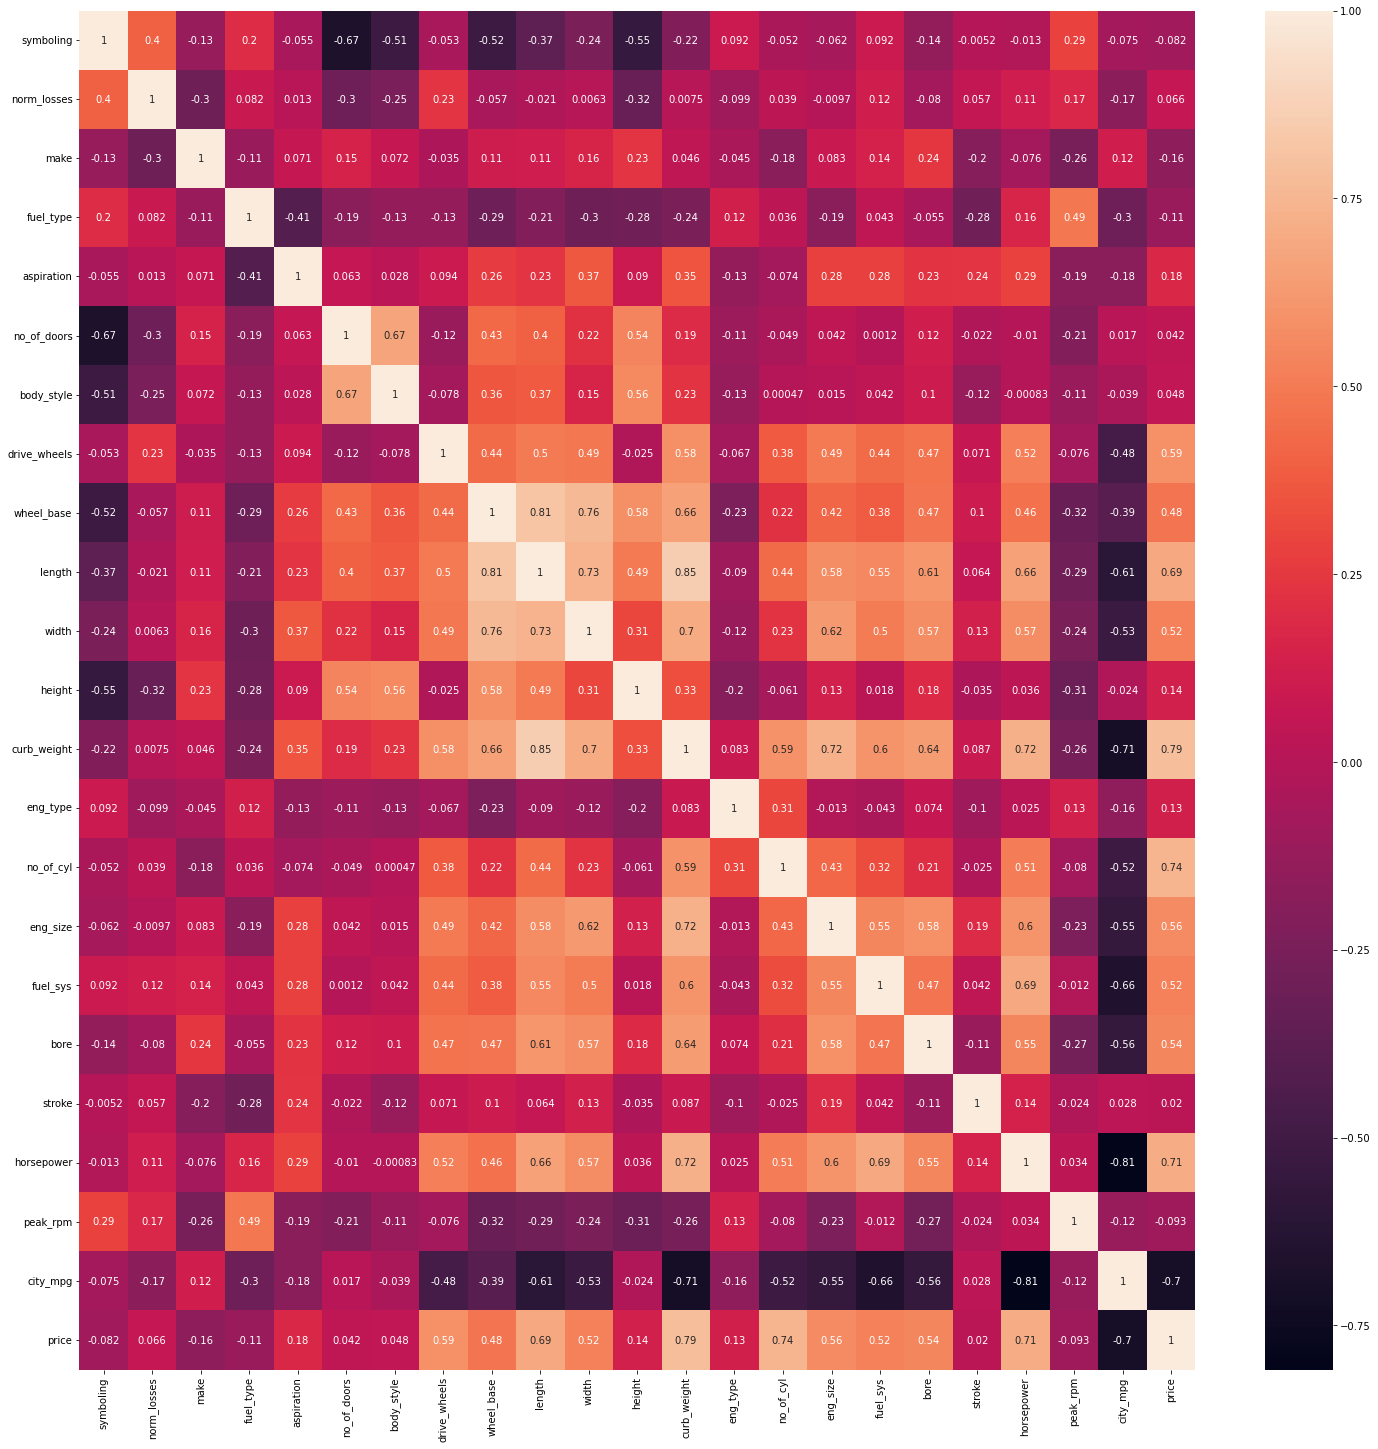

In [116]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

* There are no more highly correlated features. Also constant column is removed.

In [117]:
# Checking for Duplicated rows
df.duplicated().sum()

0

* There are no duplicate rows.

 ## 8.**MODEL BUILDING & EVALUATION**

In [118]:
# Identifying independent and dependent features
x = df.drop('price',axis=1)
y = df.price

In [119]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [120]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(160, 22)
(41, 22)


## **LINEAR REGRESSION**

In [121]:
# using Linear Regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

# Model evaluation
train_acc_r2_lr = r2_score(y_train,y_train_pred_lr)
test_acc_r2_lr = r2_score(y_test,y_test_pred_lr)
print("Training R2 accuracy using Linear Regression is: ",train_acc_r2_lr*100)
print("Testing R2 accuracy using Linear Regression is: ",test_acc_r2_lr*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_lr)*(41-1))/(41-22-1))*100)
msr_lr = mean_squared_error(y_test,y_test_pred_lr)
print("MSE score is: ", msr_lr)
print("RMSE score is: ", np.sqrt(msr_lr))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_lr))

Training R2 accuracy using Linear Regression is:  86.53144036257537
Testing R2 accuracy using Linear Regression is:  76.72938159080243
Testing Adjusted R2 score is:  48.28751464622761
MSE score is:  28470850.70003938
RMSE score is:  5335.808345512363
MAE score is:  3406.7596001032775


## **K-Neighbors Regressor**

In [20]:
# Using KNN algorithm
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

# Model evaluation
train_acc_r2_knn = r2_score(y_train,y_train_pred_knn)
test_acc_r2_knn = r2_score(y_test,y_test_pred_knn)
print("Training R2 accuracy using KNN Regression is: ",train_acc_r2_knn*100)
print("Testing R2 accuracy using KNN Regression is: ",test_acc_r2_knn*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_knn)*(41-1))/(41-22-1))*100)
msr_knn = mean_squared_error(y_test,y_test_pred_knn)
print("MSE score is: ", msr_knn)
print("RMSE score is: ", np.sqrt(msr_knn))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_knn))

NameError: name 'x_train' is not defined

## **SVM**

In [123]:
# using SVM algorithm
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
y_train_pred_svr = svr.predict(x_train)
y_test_pred_svr = svr.predict(x_test)

# Model evaluation
train_acc_r2_svr = r2_score(y_train,y_train_pred_svr)
test_acc_r2_svr = r2_score(y_test,y_test_pred_svr)
print("Training R2 accuracy using SVM Regression is: ",train_acc_r2_svr*100)
print("Testing R2 accuracy using SVM Regression is: ",test_acc_r2_svr*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_svr)*(41-1))/(41-22-1))*100)
msr_svr = mean_squared_error(y_test,y_test_pred_svr)
print("MSE score is: ", msr_svr)
print("RMSE score is: ", np.sqrt(msr_svr))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_svr))

Training R2 accuracy using SVM Regression is:  -9.315945709087071
Testing R2 accuracy using SVM Regression is:  -21.91990376994277
Testing Adjusted R2 score is:  -170.9331194887617
MSE score is:  149165068.0080445
RMSE score is:  12213.315193183402
MAE score is:  7943.122270031737


## **DECISION TREE CLASSIFIER**

In [124]:
# using Decision Tree algorithm
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

# Model evaluation
train_acc_r2_dt = r2_score(y_train,y_train_pred_dt)
test_acc_r2_dt = r2_score(y_test,y_test_pred_dt)
print("Training R2 accuracy using Decision tree Regression is: ",train_acc_r2_dt*100)
print("Testing R2 accuracy using Decision tree Regression is: ",test_acc_r2_dt*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_dt)*(41-1))/(41-22-1))*100)
msr_dt = mean_squared_error(y_test,y_test_pred_dt)
print("MSE score is: ", msr_dt)
print("RMSE score is: ", np.sqrt(msr_dt))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_dt))

Training R2 accuracy using Decision tree Regression is:  99.89831862870213
Testing R2 accuracy using Decision tree Regression is:  89.4528958266559
Testing Adjusted R2 score is:  76.56199072590202
MSE score is:  12904041.609756097
RMSE score is:  3592.219593754827
MAE score is:  1950.3902439024391


In [125]:
# using Gradient Boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

y_train_pred_gb = gb.predict(x_train)
y_test_pred_gb = gb.predict(x_test)

# Model evaluation
train_acc_r2_gb = r2_score(y_train,y_train_pred_gb)
test_acc_r2_gb = r2_score(y_test,y_test_pred_gb)
print("The training R2 accuracy using Gradient Boosting is:",train_acc_r2_gb*100)
print("The testing R2 accuracy using Gradient Boosting is:",test_acc_r2_gb*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_gb)*(41-1))/(41-22-1))*100)
msr_gb = mean_squared_error(y_test,y_test_pred_gb)
print("MSE score is: ", msr_gb)
print("RMSE score is: ", np.sqrt(msr_gb))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_gb))

The training R2 accuracy using Gradient Boosting is: 99.22053302005716
The testing R2 accuracy using Gradient Boosting is: 94.9681530034094
Testing Adjusted R2 score is:  88.81811778535422
MSE score is:  6156302.426786809
RMSE score is:  2481.1897200308586
MAE score is:  1656.7798100138448


## **XGBOOST REGRESSOR**

In [126]:
# Using XGBoost algorithm
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

# Model evaluation
train_acc_r2_xgb = r2_score(y_train,y_train_pred_xgb)
test_acc_r2_xgb = r2_score(y_test,y_test_pred_xgb)
print("The training R2 accuracy using XG Boost is:",train_acc_r2_xgb*100)
print("The testing R2 accuracy using XB Boost is:",test_acc_r2_xgb*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_xgb)*(41-1))/(41-22-1))*100)
msr_xgb = mean_squared_error(y_test,y_test_pred_xgb)
print("MSE score is: ", msr_xgb)
print("RMSE score is: ", np.sqrt(msr_xgb))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_xgb))

The training R2 accuracy using XG Boost is: 99.89824021512386
The testing R2 accuracy using XB Boost is: 92.59952491032328
Testing Adjusted R2 score is:  83.5544998007184
MSE score is:  9054242.465007683
RMSE score is:  3009.026830223965
MAE score is:  1908.5585580221036


## **RANDOM FOREST REGRESSOR**

In [127]:
# Using Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Model evaluation
train_acc_r2_rf = r2_score(y_train,y_train_pred_rf)
test_acc_r2_rf = r2_score(y_test,y_test_pred_rf)
print("The training R2 accuracy using Random Forest is:",train_acc_r2_rf*100)
print("The testing R2 accuracy using Random Forest is:",test_acc_r2_rf*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_rf)*(41-1))/(41-22-1))*100)
msr_rf = mean_squared_error(y_test,y_test_pred_rf)
print("MSE score is: ", msr_rf)
print("RMSE score is: ", np.sqrt(msr_rf))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_rf))

The training R2 accuracy using Random Forest is: 96.98578103166696
The testing R2 accuracy using Random Forest is: 86.21079174165337
Testing Adjusted R2 score is:  69.35731498145194
MSE score is:  16870651.33773875
RMSE score is:  4107.389844869701
MAE score is:  2489.5789674796747


In [128]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_clf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='r2',param_distributions=random_grid,n_iter=100,verbose=2,cv=3,random_state=42,n_jobs=-1)

rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print(rf_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [129]:
rf_after = RandomForestRegressor(n_estimators=400,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=False)
rf_after.fit(x_train,y_train)

y_train_pred_rfafter = rf_after.predict(x_train)
y_test_pred_rfafter = rf_after.predict(x_test)

train_acc_r2_rfafter = r2_score(y_train,y_train_pred_rfafter)
test_acc_r2_rfafter = r2_score(y_test,y_test_pred_rfafter)
print("Training R2 score after Hyperparameter tuning on Random forest is:", train_acc_r2_rfafter*100)
print("Testing R2 score after Hyperparameter tuning on Random forest is:", test_acc_r2_rfafter*100)
print("Testing Adjusted R2 score is: ",(1-((1-test_acc_r2_rfafter)*(41-1))/(41-22-1))*100)
msr_rfafter = mean_squared_error(y_test,y_test_pred_rfafter)
print("MSE score is: ", msr_rfafter)
print("RMSE score is: ", np.sqrt(msr_rfafter))
print("MAE score is: ", mean_absolute_error(y_test,y_test_pred_rfafter))

Training R2 score after Hyperparameter tuning on Random forest is: 99.89831862870213
Testing R2 score after Hyperparameter tuning on Random forest is: 94.451462613851
Testing Adjusted R2 score is:  87.6699169196689
MSE score is:  6788456.445239862
RMSE score is:  2605.466646349529
MAE score is:  1553.0564634146342


**So far, Gradient Boosting and Random Forest algorithms have given the best scores:**
 #### GRADIENT BOOSTING
* The training R2 accuracy using Gradient Boosting is: 99.22053302005716<br>
* The testing R2 accuracy using Gradient Boosting is: 94.9681530034094<br>
* Testing Adjusted R2 score is:  88.81811778535422<br>
* MSE score is:  6156302.426786809<br>
* RMSE score is:  2481.1897200308586<br>
* MAE score is:  1656.7798100138448<br>
  #### RANDOM FOREST  
* Training R2 score after Hyperparameter tuning on Random forest is: 99.89831862870213<br>
* Testing R2 score after Hyperparameter tuning on Random forest is: 94.451462613851<br>
* Testing Adjusted R2 score is:  87.6699169196689<br>
* MSE score is:  6788456.445239862<br>
* RMSE score is:  2605.466646349529<br>
* MAE score is:  1553.0564634146342

###  3.CHECKING CROSS VALIDATION SCORES

In [131]:
# Checking for cross validation scores of all these models mainly Gradient Boost and Random Forest models
from sklearn.model_selection import cross_val_score

score_lr = cross_val_score(lr,x,y,cv=3,scoring='r2')
print(score_lr)
print("Cross validation score of Linear Regression model is:",score_lr.mean())

score_knn = cross_val_score(knn,x,y,cv=3,scoring='r2')
print(score_knn)
print("Cross validation score of KNN model is:",score_knn.mean())

score_svr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print(score_svr)
print("Cross validation score of SVR model is:",score_svr.mean())

score_dt = cross_val_score(dt,x,y,cv=3,scoring='r2')
print(score_dt)
print("Cross validation score of Decision Tree model is:",score_dt.mean())

score_gb = cross_val_score(gb,x,y,cv=3,scoring='r2')
print(score_gb)
print("Cross validation score of Gradient Boost model is:",score_gb.mean())

score_xgb = cross_val_score(xgb,x,y,cv=3,scoring='r2')
print(score_xgb)
print("Cross validation score of XG Boost model is:",score_xgb.mean())

score_rfafter = cross_val_score(rf_after,x,y,cv=3,scoring='r2')
print(score_rfafter)
print("Cross validation score of Random Forest model is:",score_rfafter.mean())

[ 0.6154544   0.36697642 -0.85743858]
Cross validation score of Linear Regression model is: 0.041664079961660404
[ 0.30571883  0.55311535 -0.69954503]
Cross validation score of KNN model is: 0.05309638233246209
[-0.20935183 -0.2448066  -0.01494369]
Cross validation score of SVR model is: -0.15636737650881907
[0.35543453 0.4146508  0.12383546]
Cross validation score of Decision Tree model is: 0.2979735956409533
[0.56014578 0.65703396 0.39638363]
Cross validation score of Gradient Boost model is: 0.5378544577413296
[0.62451125 0.61963064 0.65658258]
Cross validation score of XG Boost model is: 0.6335748203051849
[0.76522458 0.62552531 0.63047936]
Cross validation score of Random Forest model is: 0.6737430824341969


* Training R2 score after Hyperparameter tuning on Random forest is: 99.89831862870213<br>
* Testing R2 score after Hyperparameter tuning on Random forest is: 94.451462613851<br>
* Testing Adjusted R2 score is:  87.6699169196689<br>
* MSE score is:  6788456.445239862<br>
* RMSE score is:  2605.466646349529<br>
* MAE score is:  1553.0564634146342<br>
* Cross validation score of Random Forest model is: 0.6737430824341969

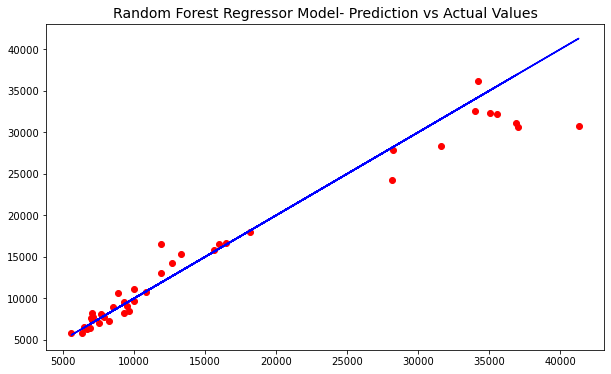

In [132]:
plt.figure(figsize = (10,6))
plt.title("Random Forest Regressor Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = y_test, y = y_test_pred_rfafter, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

### **RESULT:** **Since Random Forest model comparitively has higher train, test and Cross validation scores and lower MSE, RMSE, MAE score, we choose this model for this problem**